# New Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving Expenses.xlsx to Expenses.xlsx


In [2]:
df = pd.read_excel('Expenses.xlsx')
print(df.head())

   S.No      Name Month  Gas  House Rent  Milk  Electricity Bill   Loan  \
0     1      Ammu  July  283        2433   400               266      0   
1     2  Pravalli  July    0           0     0                 0  67000   
2     3       Anu  July  283        2433   400               266      0   
3     4    Venkat  July  283        2433   400               266      0   
4     5      Ammu  June  283        2433   400               333      0   

   Dwakra  LIC  ...  Clothes  Trips  Products  Vegetables  Petrol  Fruits  \
0       0    0  ...     1000   1000       500         266       0     333   
1       0    0  ...        0      0       500           0       0       0   
2    5300    0  ...      500    500         0         266       0     333   
3       0    0  ...        0      0         0         266    3000     333   
4       0    0  ...        0  10000       500         266       0     666   

   Mobile Recharge   NV  Junk food  Groceries  
0              800  500        500    

In [13]:
print(df.info())
print("Null Value count:")
print(df.isnull().sum())
print("\nNumber of duplicates:", df.duplicated().sum())
if 'S.No' in df.columns:
    df.drop('S.No', axis=1, inplace=True)
    print("\nDropped 'S.No' column")
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)
expense_columns = df.columns[3:]
df[expense_columns] = df[expense_columns].replace(0, np.nan)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("\nAfter cleaning:")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              40 non-null     object  
 1   month             40 non-null     category
 2   gas               30 non-null     float64 
 3   house_rent        30 non-null     float64 
 4   milk              30 non-null     float64 
 5   electricity_bill  30 non-null     float64 
 6   loan              12 non-null     float64 
 7   dwakra            10 non-null     float64 
 8   lic               2 non-null      float64 
 9   cable             30 non-null     float64 
 10  clothes           12 non-null     float64 
 11  trips             26 non-null     float64 
 12  products          20 non-null     float64 
 13  vegetables        30 non-null     float64 
 14  petrol            10 non-null     float64 
 15  fruits            30 non-null     float64 
 16  mobile_recharge   8 non-null

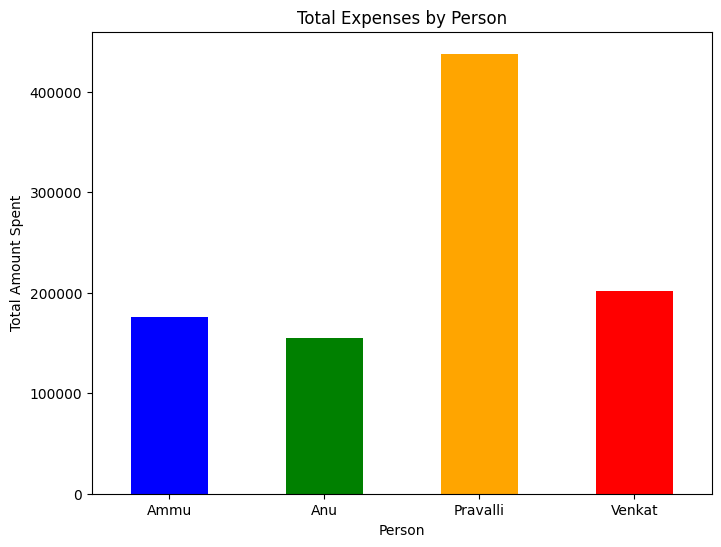

In [15]:
# Calculate total expenses by person
person_totals = df.groupby('name')[expense_columns].sum().sum(axis=1)

plt.figure(figsize=(8, 6))
person_totals.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Total Expenses by Person')
plt.xlabel('Person')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-16-2766369048.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_totals = df.groupby('month')[expense_columns].sum().sum(axis=1)


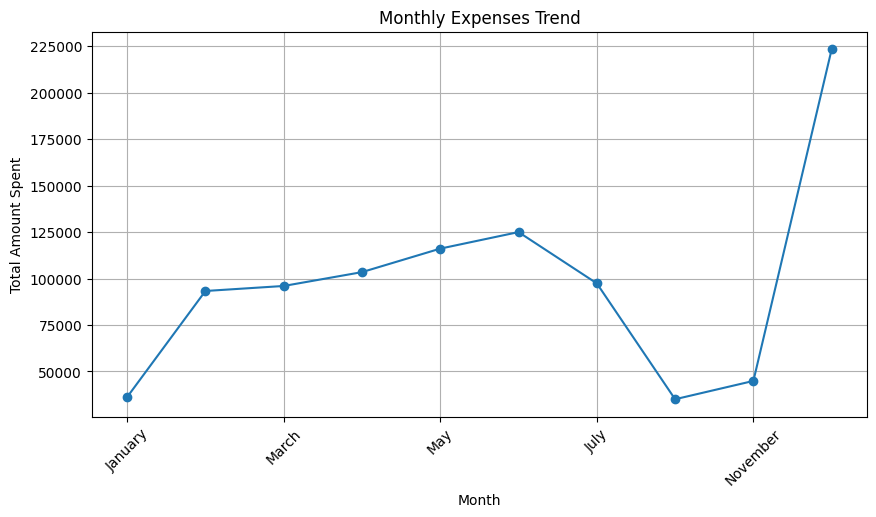

In [16]:
# Calculate total expenses by month
#Stacked Bar Chart
monthly_totals = df.groupby('month')[expense_columns].sum().sum(axis=1)

plt.figure(figsize=(10, 5))
monthly_totals.plot(kind='line', marker='o')
plt.title('Monthly Expenses Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

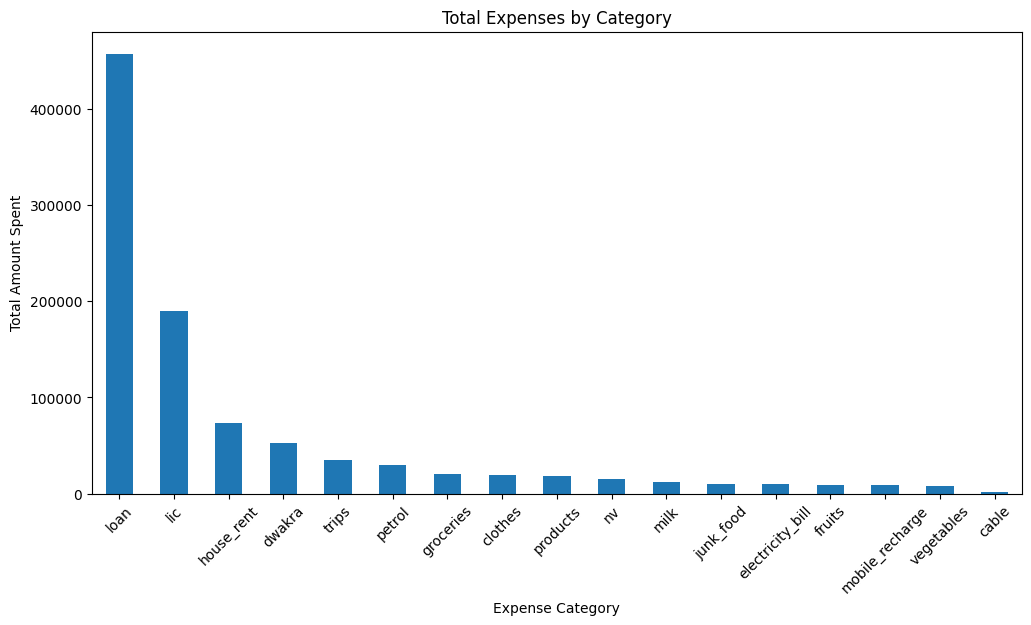

In [40]:
# Calculate total for each expense category
# Box Plot
category_totals = df[expense_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_totals.plot(kind='bar')
plt.title('Total Expenses by Category')
plt.xlabel('Expense Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()

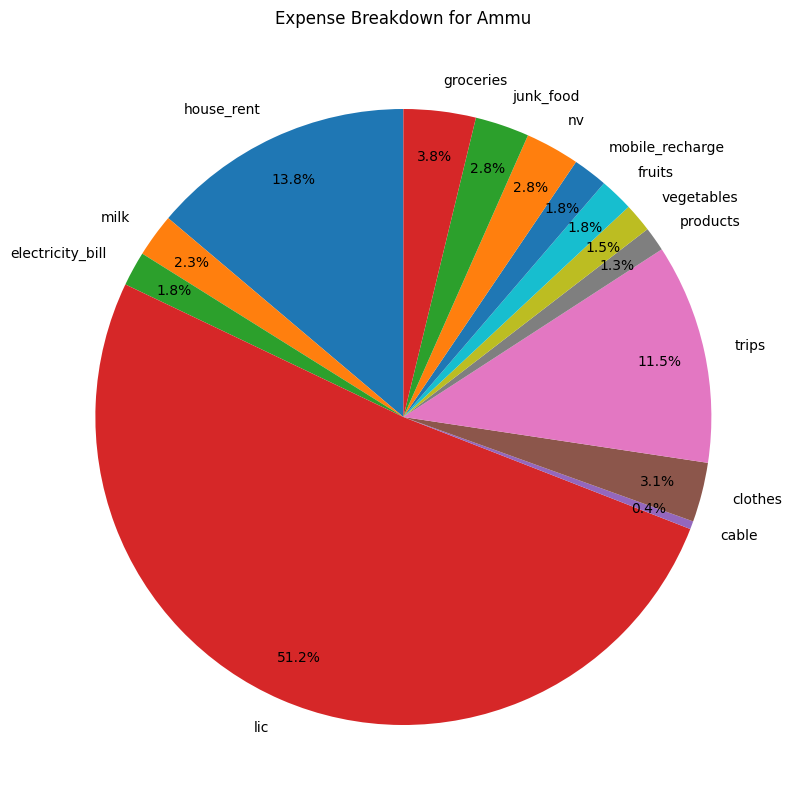

In [28]:
# Select one person (change name as needed)
person = 'Ammu'
person_data = df[df['name'] == person][expense_columns].sum()
person_data = person_data[person_data > 0]
plt.figure(figsize=(10, 10))
person_data.plot(kind='pie', autopct='%1.1f%%', startangle=90,pctdistance=0.85)
plt.title(f'Expense Breakdown for {person}')
plt.ylabel('')  # Remove y-label
plt.tight_layout
plt.show()

<Figure size 1000x600 with 0 Axes>

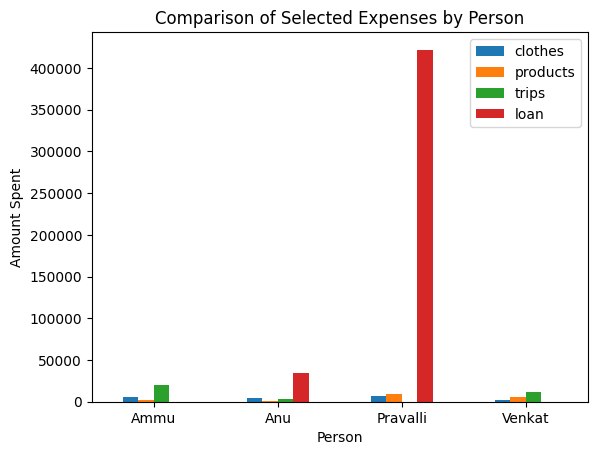

In [38]:
# Compare specific expenses across people
compare_cols = ['clothes', 'products', 'trips', 'loan']

plt.figure(figsize=(10, 6))
df.groupby('name')[compare_cols].sum().plot(kind='bar')
plt.title('Comparison of Selected Expenses by Person')
plt.xlabel('Person')
plt.ylabel('Amount Spent')
plt.xticks(rotation=0)
plt.show()

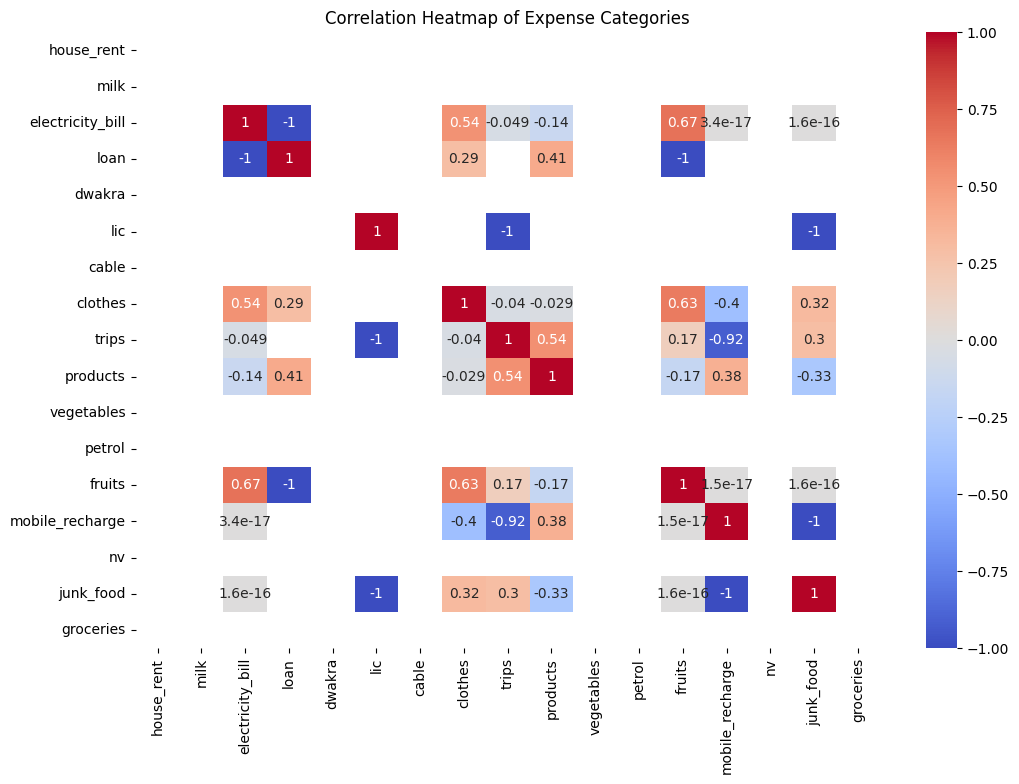

In [39]:
# Calculate correlation between expense categories
plt.figure(figsize=(12, 8))
sns.heatmap(df[expense_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Expense Categories')
plt.show()

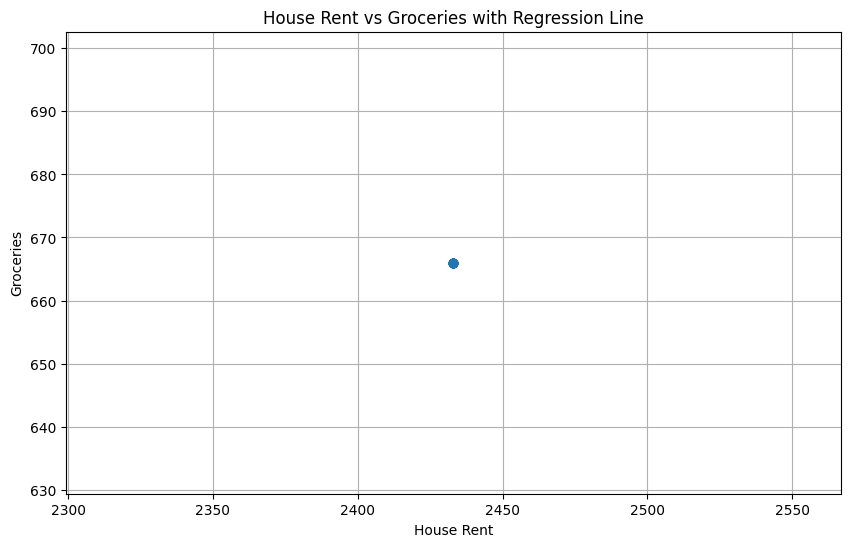

In [44]:
plt.figure(figsize=(10, 6))
sns.regplot(x='house_rent', y='groceries', data=df)
plt.title('House Rent vs Groceries with Regression Line')
plt.xlabel('House Rent')
plt.ylabel('Groceries')
plt.grid(True)
plt.show()

/tmp/ipython-input-48-891103639.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_expenses = df.groupby('month')[expense_columns].sum()


<Figure size 1200x600 with 0 Axes>

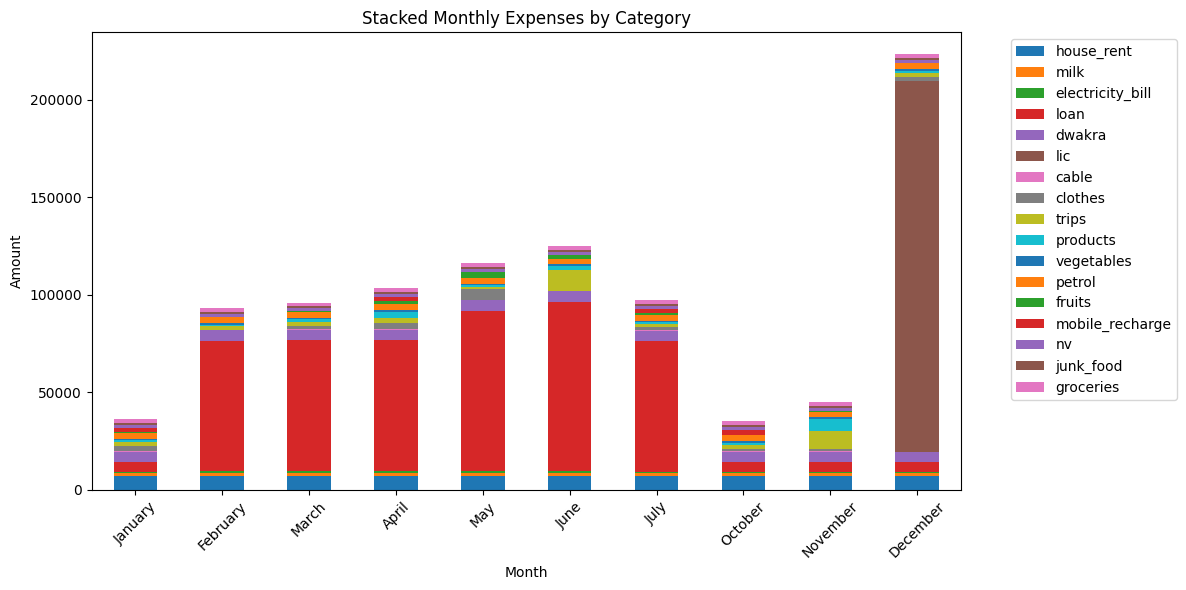

In [48]:
# Group by month and sum expenses
monthly_expenses = df.groupby('month')[expense_columns].sum()

plt.figure(figsize=(12, 6))
monthly_expenses.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Stacked Monthly Expenses by Category')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-50-2572635276.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_totals = df.groupby('month')[expense_columns].sum().sum(axis=1).reset_index()


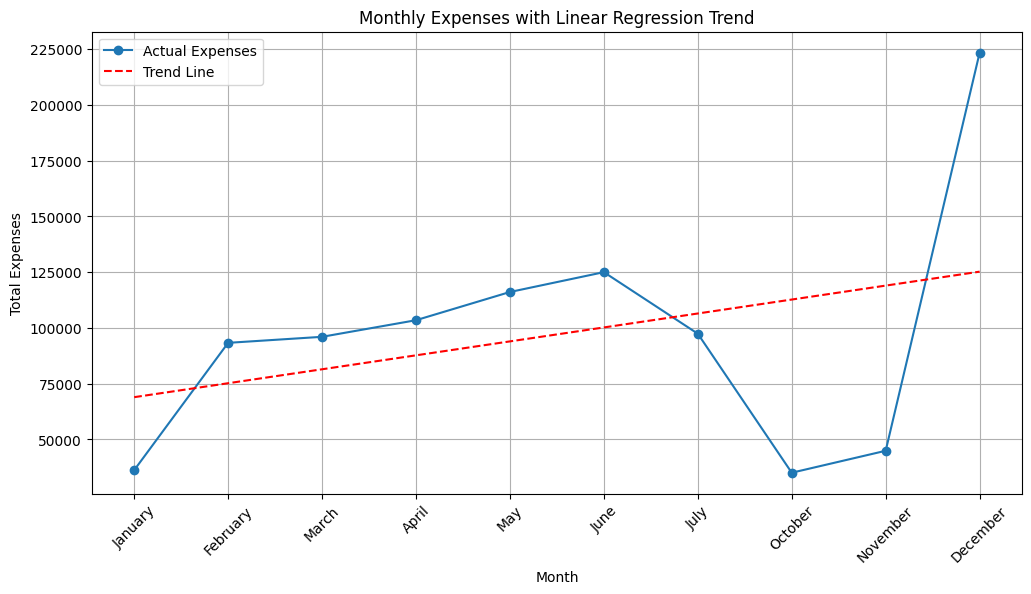

Trend equation: y = 6254.33x + 62696.67


In [50]:
from sklearn.linear_model import LinearRegression

# Calculate total monthly expenses
monthly_totals = df.groupby('month')[expense_columns].sum().sum(axis=1).reset_index()
monthly_totals.columns = ['Month', 'Total']
monthly_totals['Month_num'] = monthly_totals['Month'].cat.codes + 1  # Convert month to numerical

# Prepare data for regression
X = monthly_totals[['Month_num']]
y = monthly_totals['Total']

# Fit linear regression
model = LinearRegression()
model.fit(X, y)
trend_line = model.predict(X)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_totals['Month'], monthly_totals['Total'], 'o-', label='Actual Expenses')
plt.plot(monthly_totals['Month'], trend_line, 'r--', label='Trend Line')
plt.title('Monthly Expenses with Linear Regression Trend')
plt.xlabel('Month')
plt.ylabel('Total Expenses')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

print(f"Trend equation: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

/tmp/ipython-input-52-1058124777.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = df.groupby('month')[category].sum()


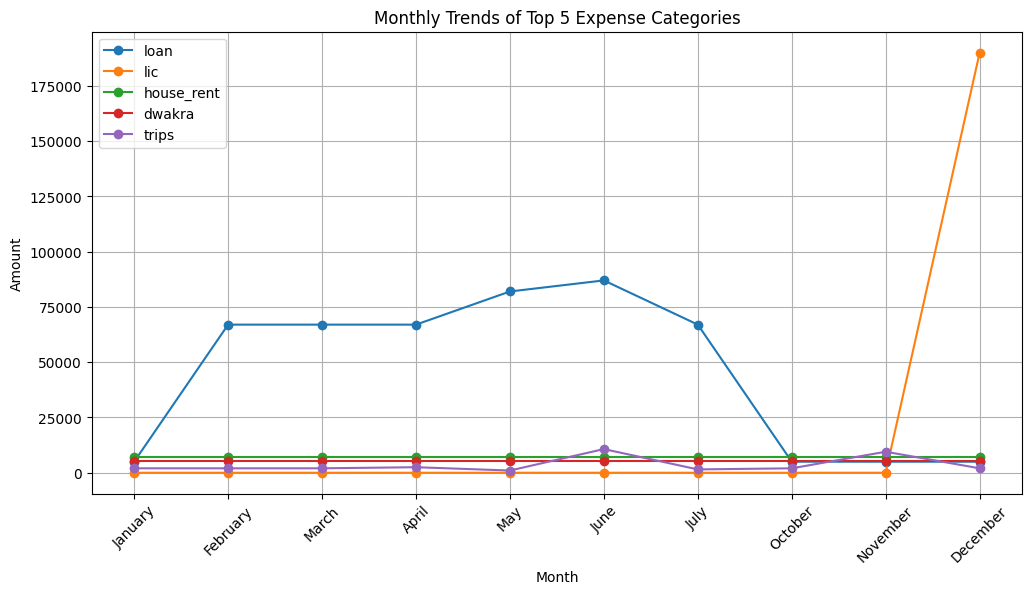

In [52]:
# Line Chart of Monthly Trends for Top 5 Expense Categories
top_categories = df[expense_columns].sum().nlargest(5).index
plt.figure(figsize=(12, 6))
for category in top_categories:
    monthly_data = df.groupby('month')[category].sum()
    plt.plot(monthly_data.index, monthly_data.values, marker='o', label=category)
plt.title('Monthly Trends of Top 5 Expense Categories')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-57-3947684282.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = df.groupby('month')[top_categories].sum()


<Figure size 1200x600 with 0 Axes>

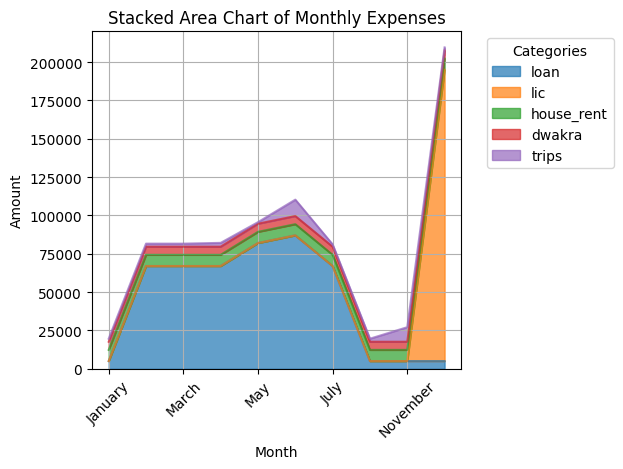

In [57]:
# Stacked Area Chart of Monthly Expenses
top_categories = df[expense_columns].sum().nlargest(5).index
monthly_data = df.groupby('month')[top_categories].sum()

plt.figure(figsize=(12, 6))
monthly_data.plot(kind='area', stacked=True, alpha=0.7)
plt.title('Stacked Area Chart of Monthly Expenses')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()